<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

---

# **Calculando o Drawdown de um ativo com Python**


---

### **1. Bibliotecas Necessárias**

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

---

### **2. Obter dados do ativo financeiro**

In [3]:
df = yf.download('ITUB4.SA', start='2000-01-01', interval='1D')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-21,2.815505,2.988535,2.815174,2.960552,1.724757,74224
2000-12-22,2.930748,2.930748,2.814843,2.832229,1.649998,23312
2000-12-25,2.832229,2.832229,2.832229,2.832229,1.649998,0
2000-12-26,2.816664,2.834712,2.790006,2.831401,1.649515,7851
2000-12-27,2.881074,2.927437,2.831401,2.927437,1.705464,26996
...,...,...,...,...,...,...
2023-06-29,28.230000,28.549999,28.209999,28.490000,28.472307,61907700
2023-06-30,28.770000,28.920000,28.350000,28.420000,28.402351,27856400
2023-07-03,28.540001,29.010000,28.360001,28.959999,28.959999,17644300


In [7]:
#df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df

,Close
Date,
2000-12-21,2.960552
2000-12-22,2.832229
2000-12-25,2.832229
2000-12-26,2.831401
2000-12-27,2.927437
...,...
2023-06-29,28.490000
2023-06-30,28.420000
2023-07-03,28.959999


<Axes: xlabel='Date'>

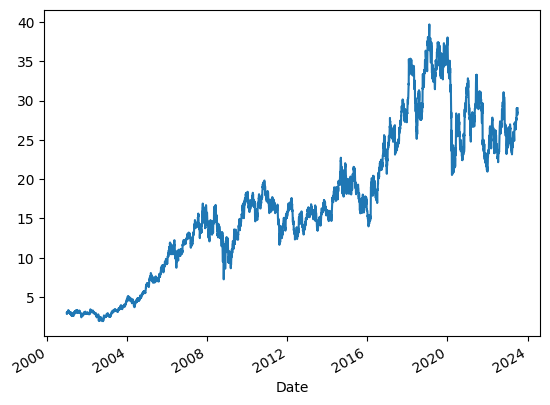

In [8]:
df['Close'].plot()

---

### **3. Drawdown**

In [10]:
df['peak'] = df['Close'].cummax()
df.head(30)

,Close,peak
Date,,
2000-12-21,2.960552,2.960552
2000-12-22,2.832229,2.960552
2000-12-25,2.832229,2.960552
2000-12-26,2.831401,2.960552
2000-12-27,2.927437,2.960552
2000-12-28,3.063211,3.063211
2000-12-29,3.063211,3.063211
2001-01-01,3.063211,3.063211
2001-01-02,2.963864,3.063211


<Axes: xlabel='Date'>

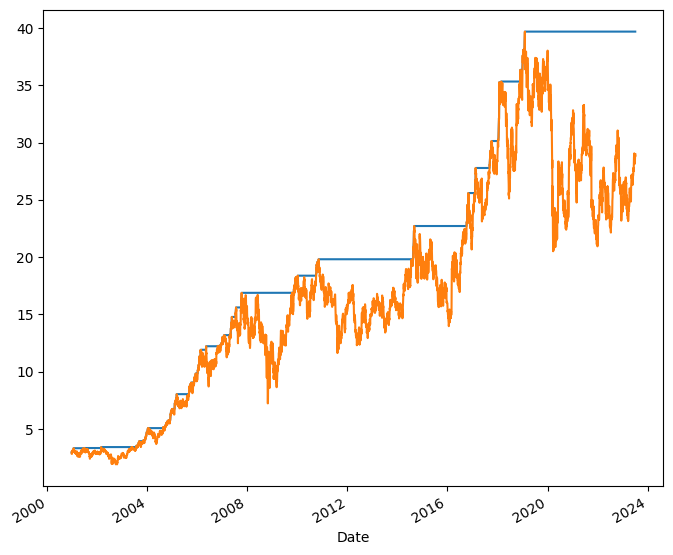

In [11]:
df['peak'].plot(figsize=(8,7))
df['Close'].plot(figsize=(8,7))

In [12]:
df['drawdown'] = ((df['Close'] - df['peak']) / df['peak']) * 100
df.head(10)

,Close,peak,drawdown
Date,,,
2000-12-21,2.960552,2.960552,0.000000
2000-12-22,2.832229,2.960552,-4.334431
2000-12-25,2.832229,2.960552,-4.334431
2000-12-26,2.831401,2.960552,-4.362391
2000-12-27,2.927437,2.960552,-1.118538
2000-12-28,3.063211,3.063211,0.000000
2000-12-29,3.063211,3.063211,0.000000
2001-01-01,3.063211,3.063211,0.000000
2001-01-02,2.963864,3.063211,-3.243227


<Axes: xlabel='Date'>

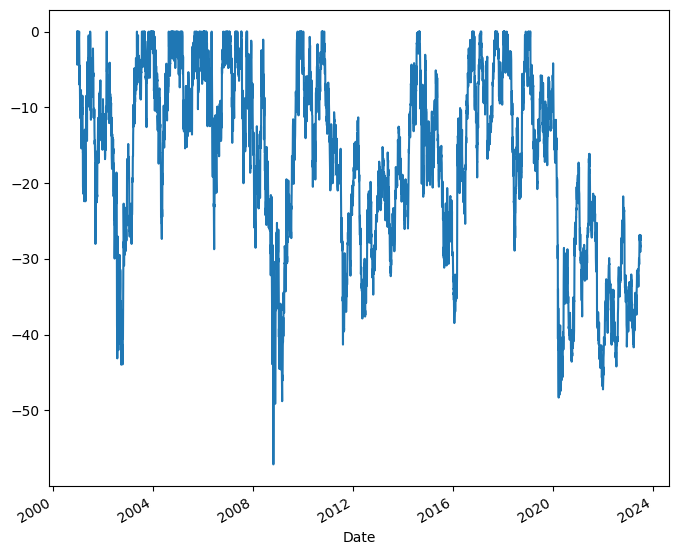

In [13]:
df['drawdown'].plot(figsize=(8,7))

In [14]:
df['drawdown'].min()

-57.10784155950079

In [15]:
df[df['drawdown'] == -57.10784155950079]

,Close,peak,drawdown
Date,,,
2008-10-24,7.244082,16.889059,-57.107842
2008-10-27,7.244082,16.889059,-57.107842
